In [1]:
from __future__ import division, print_function
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(precision=2, suppress=True)


import numpy as np
import MotionClouds as mc

downscale = 2
fx, fy, ft = mc.get_grids(mc.N_X/downscale, mc.N_Y/downscale, mc.N_frame/downscale)

N_X = fx.shape[0]
width = 29.7*256/1050
sf_0 = 4.*width/N_X
B_V = 2.5     # BW temporal frequency (speed plane thickness)
B_sf = sf_0   # BW spatial frequency
theta = 0.0   # Central orientation
B_theta_low, B_theta_high = np.pi/32, 2*np.pi 
B_V = 0.5
seed=12234565

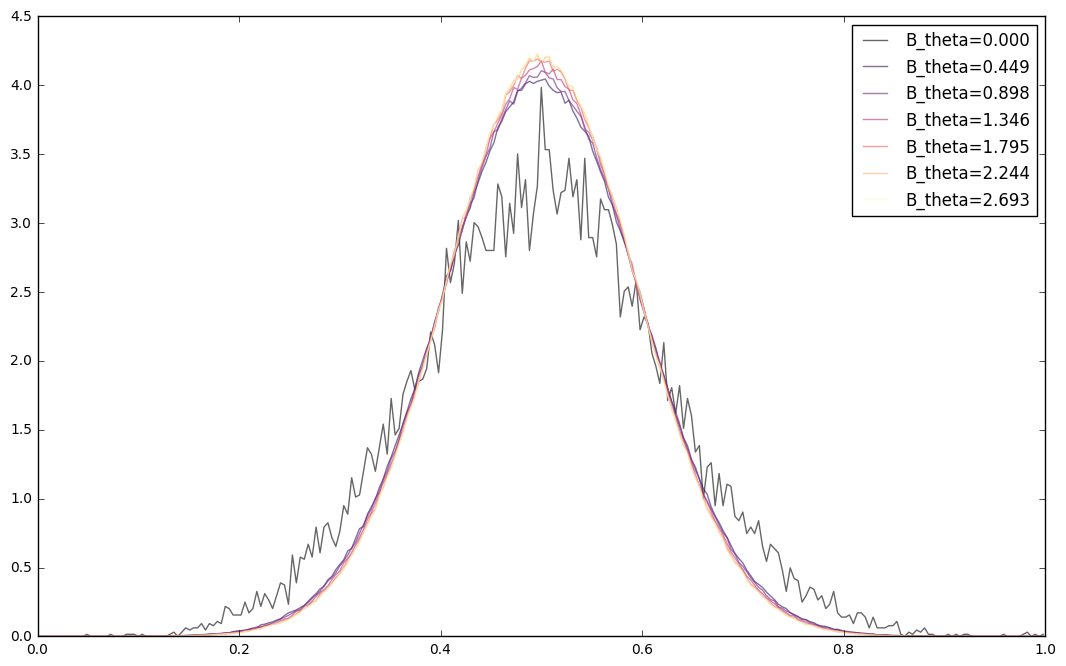

In [27]:
fig, ax = plt.subplots(1, 1, figsize=(13, 8))
contrasts = np.linspace(0, 1, 256)
N_theta = 7 
B_thetas = B_theta_high*2.**-np.arange(N_theta)

for B_theta, color in zip(np.linspace(0, np.pi, N_theta, endpoint=False), 
                            [plt.cm.magma(h) for h in np.linspace(0, 1, N_theta)]):
    mc_i = mc.envelope_gabor(fx, fy, ft, V_X=0., V_Y=0., B_V=B_V, sf_0=sf_0, B_sf=B_sf, 
                             theta=theta, B_theta=B_theta)
    im = mc.rectif(mc.random_cloud(mc_i, seed=seed))
    hist, bins = np.histogram(im.ravel(), bins=contrasts, density=True)
    hist /= hist.mean()
    #print (hist, bins)
    ax.plot(.5*bins[1:] + .5*bins[:-1], hist, alpha=.6, color=color, lw=1, label='B_theta=%.3f' % B_theta)
ax.legend()